In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


from sklearn.neighbors import KNeighborsRegressor

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import scipy

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
train_df = pd.read_json('new_train.json', lines=True)

In [3]:
train_df['entities'][0][0], train_df['entities'][0][1]

({'entity': 'bimagrumab', 'type': 'Drug', 'start': 35, 'end': 45},
 {'entity': 'inclusion body myositis',
  'type': 'Disease',
  'start': 49,
  'end': 72})

In [4]:
train_df['entities'][0]

[{'entity': 'bimagrumab', 'type': 'Drug', 'start': 35, 'end': 45},
 {'entity': 'inclusion body myositis',
  'type': 'Disease',
  'start': 49,
  'end': 72},
 {'entity': 'inclusion body myositis',
  'type': 'Disease',
  'start': 230,
  'end': 253},
 {'entity': 'inclusion body myositis',
  'type': 'Disease',
  'start': 413,
  'end': 436},
 {'entity': 'Bimagrumab', 'type': 'Drug', 'start': 148, 'end': 158},
 {'entity': '6MWD', 'type': 'Gene', 'start': 274, 'end': 278},
 {'entity': 'pyrimidine nucleoside derivatives',
  'type': 'ChemicalCompound',
  'start': 273,
  'end': 306}]

In [5]:
df1 = pd.DataFrame(train_df['entities'][0][0], index=[0])
df2 = pd.DataFrame(train_df['entities'][0][1], index=[1])

In [6]:
pd.concat([df1, df2], axis=0)

,entity,type,start,end
0,bimagrumab,Drug,35,45
1,inclusion body myositis,Disease,49,72


In [ ]:
df_tmp = pd.DataFrame(train_df['entities'][0][0], index = [0])

for i in range(train_df['entities'].shape[0]):
    for j in range(1, len(train_df['entities'][i])):
        df_tmp = pd.concat([df_tmp, pd.DataFrame(train_df['entities'][i][j], index = [j+i])], axis=0)

In [4]:
train_df.head()

,text,entities
0,Safety and efficacy of intravenous bimagrumab ...,"[{'entity': 'bimagrumab', 'type': 'Drug', 'sta..."
1,Health security in 2014: building on preparedn...,"[{'entity': 'influenza A', 'type': 'Virus', 's..."
2,Distinct spread of DNA and RNA viruses among m...,"[{'entity': 'DNA', 'type': 'Gene', 'start': 19..."
3,Progress towards development of an HIV vaccine...,"[{'entity': 'HIV vaccine', 'type': 'Drug', 'st..."
4,Switching from originator infliximab to biosim...,"[{'entity': 'originator infliximab', 'type': '..."


In [3]:
df_tmp2 = pd.DataFrame(train_df['entities'][0][0], index = [0])

for i in range(train_df['entities'].shape[0]):
    for j in range(1, len(train_df['entities'][i])):
        df_tmp2 = pd.concat([df_tmp2, pd.DataFrame(train_df['entities'][i][j], index = [i])], axis=0)

In [10]:
train_df.drop('entities', axis=1)['text']

0       Safety and efficacy of intravenous bimagrumab ...
1       Health security in 2014: building on preparedn...
2       Distinct spread of DNA and RNA viruses among m...
3       Progress towards development of an HIV vaccine...
4       Switching from originator infliximab to biosim...
                              ...                        
9674    Type and timing of menopausal hormone therapy ...
9675    Safety and tolerability of a novel, polyclonal...
9676    Timing of antiepileptic drug withdrawal and lo...
9677    Prognostic effect of chromosomal abnormalities...
9678    Nucleoside reverse-transcriptase inhibitor cro...
Name: text, Length: 9679, dtype: object

In [4]:
tmp_lst = []
for i in range(55221):
    tmp_lst.append(train_df['text'][list(df_tmp2.index)[i]])

In [5]:
df_tmp2['text'] = tmp_lst

In [6]:
train_data = df_tmp2

In [7]:
train_data = train_data['text']

In [25]:
y = df_tmp2.drop('text', axis=1)
y.index = pd.RangeIndex(len(y.index))

In [35]:
train_data.index = pd.RangeIndex(len(train_data.index))
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size = 0.2)

In [ ]:
y_train.index = pd.RangeIndex(len(y_train.index))
y_test.index = pd.RangeIndex(len(y_test.index))



# Обучения с учителем

In [36]:
vect_text = TfidfVectorizer(min_df=3, max_df = 0.3, ngram_range=(1,3))

X_train_words = vect_text.fit_transform(X_train)
X_test_words = vect_text.transform(X_test)

In [37]:
vect_text_ch = TfidfVectorizer(analyzer='char')

X_train_words_ch = vect_text_ch.fit_transform(X_train)
X_test_words_ch = vect_text_ch.transform(X_test)

In [54]:
feats = ['entity', 'type']

vect_feats = DictVectorizer()
y_vect_train = vect_feats.fit_transform(y_train.drop('type', axis=1).T.to_dict().values())
y_vect_test = vect_feats.transform(y_test.drop('type', axis=1).T.to_dict().values()) 

In [16]:
y_vect_train.shape, y_vect_test.shape, y_train.shape

((44176, 12072), (11045, 12072), (44176, 4))

In [38]:
X_train_new = scipy.sparse.hstack([X_train_words, X_train_words_ch])
X_test_new = scipy.sparse.hstack([X_test_words, X_test_words_ch])

In [37]:
X_train_new.shape, y_train.shape

((44176, 793609), (44176, 4))

In [55]:
feats_num = ['start', 'end']
y_train[feats_num].shape, y_vect_train.shape

((44176, 2), (44176, 12110))

In [19]:
y_train_new = scipy.sparse.hstack([y_vect_train, y_train[feats_num]])
y_test_new = scipy.sparse.hstack([y_vect_test, y_test[feats_num]])

In [34]:
logit = LogisticRegression(max_iter=300)
logit.fit(X_train_new, y_train['type'])

/home/sid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
logit.score(X_train_new, y_train['type'])

0.6355260775081493

In [36]:
accuracy_score(y_test['type'], logit.predict(X_test_new))

0.568130375735627

In [33]:
X_train_new.shape, y_train['entity'].shape

((44176, 799304), (44176,))

In [38]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

In [62]:
knn.fit(X_train_new, y_train['type'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [63]:
accuracy_score(y_test['type'], knn.predict(X_test_new))

0.5080126754187415

# Кластеризация

In [23]:
train_df['text'][0]

'Safety and efficacy of intravenous bimagrumab in inclusion body myositis (RESILIENT): a randomised, double-blind, placebo-controlled phase 2b trial\tBimagrumab showed a good safety profile, relative to placebo, in individuals with inclusion body myositis but did not improve 6MWD. The strengths of our study are that, to the best of our knowledge, it is the largest randomised controlled trial done in people with inclusion body myositis, and it provides important natural history data over 12 months.'

In [30]:
train_df['entities'][0]

[{'entity': 'bimagrumab', 'type': 'Drug', 'start': 35, 'end': 45},
 {'entity': 'inclusion body myositis',
  'type': 'Disease',
  'start': 49,
  'end': 72},
 {'entity': 'inclusion body myositis',
  'type': 'Disease',
  'start': 230,
  'end': 253},
 {'entity': 'inclusion body myositis',
  'type': 'Disease',
  'start': 413,
  'end': 436},
 {'entity': 'Bimagrumab', 'type': 'Drug', 'start': 148, 'end': 158},
 {'entity': '6MWD', 'type': 'Gene', 'start': 274, 'end': 278},
 {'entity': 'pyrimidine nucleoside derivatives',
  'type': 'ChemicalCompound',
  'start': 273,
  'end': 306}]

# Обработка текста

In [40]:
tsne = TSNE(n_components=2)
X_train_new_transformed = tsne.fit_transform(X_train_new)

In [92]:
colors = plt.cm.get_cmap('nipy_spectral', len(entities) + 1)
y_train_nums = np.zeros(len(y_train['entity']))
for i in y_train_nums:
    i = 6
for j in range(len(entities)):
    for i in range(len(y_train['entity'])):
        k = y_train.index[i]
        if(y_train['entity'][k] == entities[j]):
            y_train_nums[i] = j
            

In [54]:
dict(y_train['entity'].value_counts())
entities = ['COVID-19', 'SARS-CoV-2', 'HIV', 'cancer', 'vaccine', 'coronavirus']
y_train.index[0]

39691

In [93]:
6 in np.array(y_train_nums)

False

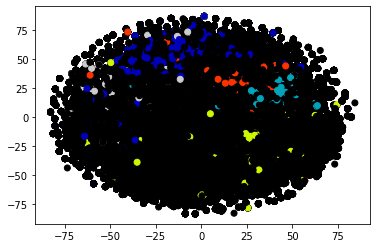

In [94]:
plt.scatter(X_train_new_transformed[:, 0], X_train_new_transformed[:, 1], c=y_train_nums, cmap=colors)

In [58]:
tsne1 = TSNE(n_components=1)
y_vect_train_transformed = tsne1.fit_transform(y_vect_train)

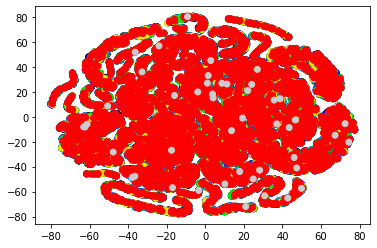

In [57]:
plt.scatter(y_vect_train_transformed[:, 0], y_vect_train_transformed[:, 1], c=y_train_nums, cmap=colors)

In [70]:
y_vect_train_transformed_t = y_vect_train_transformed.reshape(1, -1)
lasso = Lasso()
lasso.fit(X_train_new, y_vect_train_transformed)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
y_predicted = lasso.predict(X_test_new)
tsne2 = TSNE(n_components=1)
y_vect_test_transformed = tsne2.fit_transform(y_vect_test)

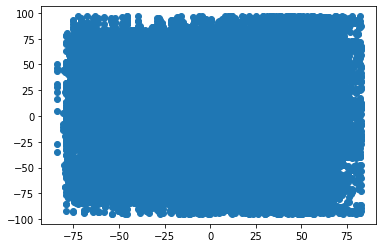

In [100]:
plt.scatter(X_train_new_transformed[:,0], y_vect_train_transformed)

In [103]:
kneigh = KNeighborsRegressor(n_jobs=-1)
kneigh.fit(X_train_new, y_vect_train_transformed)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [106]:
kneigh.score(X_train_new, y_vect_train_transformed)

0.08506374756852997

In [ ]:
y_pred_neigh = kneigh.predict(X_test_new)
accuracy_score(y_pred_neigh, y_vect_test_transformed)

In [102]:
y_train_nums = np.zeros(len(y_train['entity']))
for i in range(len(y_train['entity'])):
    k = y_train.index[i]
    y_train_nums[i] = hash(y_train['entity'][k])
X_train_nums = np.zeros(len(X_train))
for i in range(len(X_train)):
    k = X_train.index[i]
    X_train_nums[i] = hash(X_train[k])

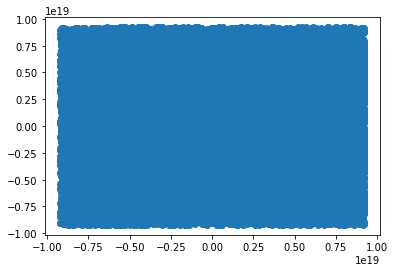

In [108]:
plt.scatter(X_train_nums, y_train_nums)

In [110]:
knn = KNeighborsRegressor(n_neighbors=3, n_jobs=-1)
knn.fit(X_train_nums.reshape(-1, 1), y_train_nums)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                    weights='uniform')

In [111]:
X_test_nums = np.zeros(len(X_test))
for i in range(len(X_test)):
    k = X_test.index[i]
    X_test_nums[i] = hash(X_test[k])
y_pred = knn.predict(X_test_nums.reshape(-1, 1))

In [113]:
y_pred_unhash = np.zeros(len(y_pred))
for i in range(len(y_pred)):
    y_pred_unhash[i] = unhash(y_pred[i])

NameError: name 'unhash' is not defined

In [114]:
y_test_nums = np.zeros(len(y_test['entity']))
for i in range(len(y_test['entity'])):
    k = y_test.index[i]
    y_test_nums[i] = hash(y_test['entity'][k])

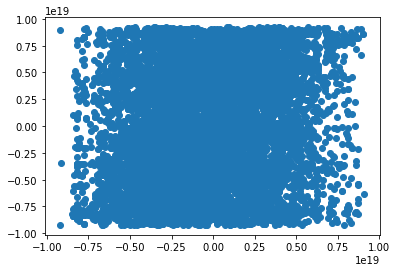

In [115]:
plt.scatter(y_pred, y_test_nums)

In [117]:
mean_squared_error(y_pred, y_test_nums)

3.21550237315656e+37